<a href="https://colab.research.google.com/github/GabrielSantiago97/replace/blob/main/replace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import files
uploaded = files.upload()

Saving List of most-streamed songs on Spotify.csv to List of most-streamed songs on Spotify.csv


In [84]:
import io
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(io.BytesIO(uploaded['List of most-streamed songs on Spotify.csv']))

In [85]:
df.head()

,Rank,Song,Streams (Billions),Artist,Release Date
0,1,Shape of You,"3,327",Ed Sheeran,6 January 2017
1,2,Blinding Lights,"3,323",The Weeknd,29 November 2019
2,3,Dance Monkey,"2,721",Tones And I,10.May.19
3,4,Someone You Loved,"2,588",Lewis Capaldi,8 November 2018
4,5,Rockstar,"2,570",Post Malone featuring 21 Savage,15 September 2017


SITUAÇÃO DE BASE DE DADOS COMUM, COM NO MÁXIMO 100 LINHAS E POUCAS COLUNAS. O PROBLEMA MAIS NA FRENTE, VEREMOS QUE QUALQUER DETALHE IMPORTA.

In [88]:
#Excluindo valores vazios
df = df.dropna()

In [90]:
#Visualizando informações
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                100 non-null    int64  
 1   Song                100 non-null    object 
 2   Streams (Billions)  100 non-null    float64
 3   Artist              100 non-null    object 
 4   Release Date        100 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.7+ KB


In [86]:
#Nessa parte detectei problema ao fazer soma na coluna 'Streams (Billions)', pois não estava no formato float ou int.
#Foi necessário mudar a ',' por '.' usando replace. 
df['Streams (Billions)'] = df['Streams (Billions)'].str.replace(',', '.')

In [89]:
#Logo após usar o replace, converti a coluna para float e, assim, poder fazer o calculo.
df['Streams (Billions)'] = pd.to_numeric(df['Streams (Billions)'], errors='coerce')

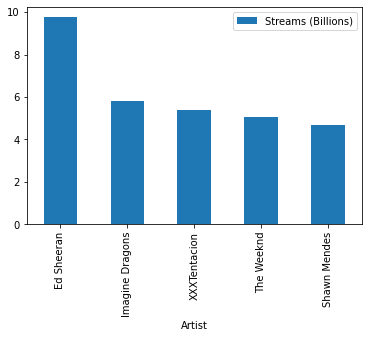

In [91]:
bestsinger = df[["Artist", "Streams (Billions)"]].groupby("Artist").sum()
bestsinger.sort_values(by="Streams (Billions)", ascending=False).head().plot.bar()